<a href="https://colab.research.google.com/github/bhuvaneswarilakshmipathy/ML_programs_/blob/main/Copy_of_Support_Vector_Regression_using_Boston_Housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Regression using Boston Housing dataset**

Mean Squared Error: 13.875725278849961


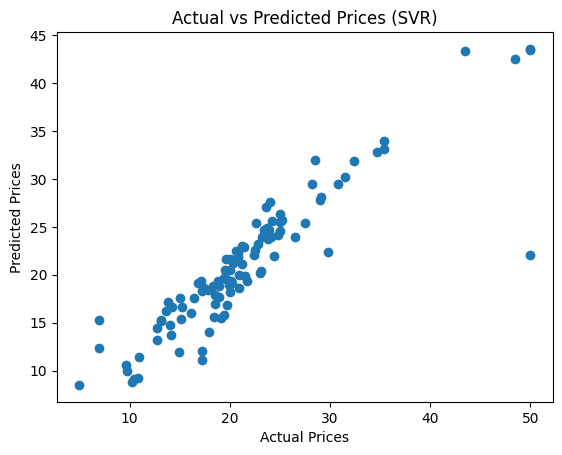

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Step 1: Load the Boston Housing dataset
boston = pd.read_csv('HousingData.csv')

# Define features (X) and target (y)
X = boston.drop('MEDV', axis=1)  # features
y = boston['MEDV']  # target

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Step 4: Fit SVR Model
regressor = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel
regressor.fit(X_train_scaled, y_train_scaled)

# Step 5: Predict on test set
y_pred_scaled = regressor.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 7: Visualize Results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (SVR)")
plt.show()